# Question - 1

In [136]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plot
import random
from mpl_toolkits import mplot3d
# from matplotlib.mlab import griddata

### Generating the points x1 and x2

We shall generate the points and then store the points in an object which we shall use to learn the function. 

In [137]:
def linear_regression_function(x1, x2, bias = 0):
    return 2*x1 + 3*x2 + bias 

In [138]:
def generate_points(n):
    '''
    This function shall generate n points in [-4, 4]^2, we shall use the random function. 
    '''    
    main = []
    for i in range(n):
        main += [(random.uniform(-4.0, 4.0), random.uniform(-4.0, 4.0))]
    main = np.array(np.array(main))
    return main

training_set_x = generate_points(400)
bias = np.random.normal(0, 0.01, 1)[0]
# Adding the noise
training_set_y = [linear_regression_function(i,  j, bias) for (i, j) in training_set_x]
training_set_y = np.array(training_set_y)

In [139]:
pd.DataFrame(training_set_y)

,0
0,-1.418982
1,-13.157175
2,3.828192
3,0.854144
4,-13.054522
...,...
395,8.013154
396,5.694531
397,7.799449
398,-2.837238


In [140]:
pd.DataFrame(training_set_x)

,0,1
0,1.553335,-1.500259
1,-1.243740,-3.548273
2,-0.488276,1.609873
3,-0.100290,0.359866
4,-1.109735,-3.603392
...,...,...
395,1.319414,1.799734
396,3.167277,-0.205049
397,-1.314677,3.484560
398,1.845982,-2.168108


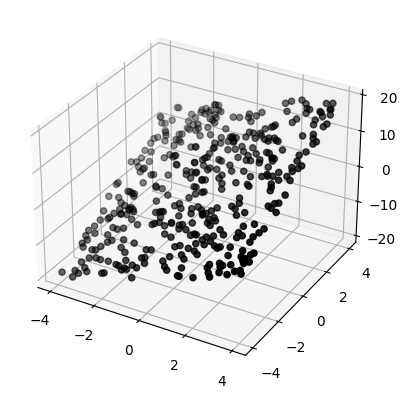

In [141]:
fig = plot.figure()
ax = plot.axes(projection='3d',)
ax.scatter3D([i[0] for i in training_set_x], [i[1] for i in training_set_x], training_set_y, color="black")
plot.savefig('./data.png')

## Question - 1.1
The below cell shall give on the loss function, which one is supposed to minimise, in order to learn the regression function. 

In [142]:
def objective_loss_function(parameters, x_set, y_set, data_points):
    '''
    The parameters must be given in such a way that the 
    dot product would result in the predicted y
    '''
    e = 0
    for i in range(data_points):
        x = x_set[i]
        y = y_set[i]
        e += (y - (np.dot(x, parameters)))**2
    return e/data_points


# This is just to check that the parameters are working just fine. 
parameters = [2, 3]
parameters = np.array(parameters)
print(objective_loss_function(parameters, training_set_x, training_set_y, 400))

0.0006188337371765874


## Question - 1.2
Plotting The loss function with respect to parameters

In [143]:
test_parameter_1 = np.linspace(-50, 50, 101).astype(int)
print(test_parameter_1)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


In [144]:
values = []
for i in range(101):
    for j in range(101):
        temp = dict()
        temp['params'] = [test_parameter_1[i], test_parameter_1[j]]
        temp['a'] = test_parameter_1[i]
        temp['b'] = test_parameter_1[j]
        temp['error'] = objective_loss_function(temp['params'], training_set_x, training_set_y, 400)
        values += [temp]

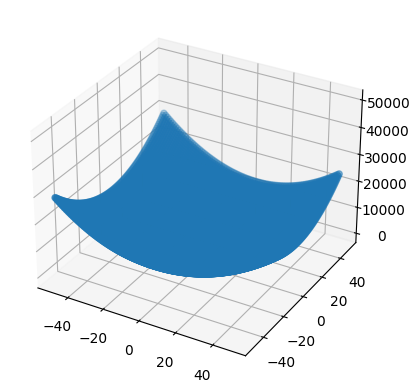

In [145]:
temp = pd.DataFrame(values)
fig = plot.figure()
ax = plot.axes(projection='3d',)
ax.scatter3D(list(temp['a']), list(temp['b']), list(temp['error']))
ax.plot(2, 3, 50000, color='red')
plot.savefig('./error_plot.png')



We can justify the curve, which is a paraboloid, because the error, which is ```mean square``` function, would result in a paraboloid. Hence we can say that the curve we have obtained is accurate. 

## Question - 1.3
Minimizing the objective function, using gradient_descent

As asked in the question we have set the convergence condition at loss of 0.001

In [146]:
def gradient_descent_algorithm(weight_now, learning_rate, x_set, y_set, data_points, epochs, tolerance = 0.001):
    if((data_points) <= 0):
        raise("Enter a valid Number of Data points")
    gradient = [0]*(len(weight_now))
    diff = 0
    w_new = [0]*(len(weight_now))
    loss = 0
    for i in range(data_points):
        x = x_set[i]
        y = y_set[i]
        diff = (np.dot(weight_now, x) - y)
        loss += diff**2
        for j in range(len(gradient)):
            gradient[j] += 2*x[j]*diff
    for i in range(len(gradient)):
        gradient[i] = gradient[i]/data_points
    loss /= data_points
    for i in range(len(w_new)):
        w_new[i] = weight_now[i] - learning_rate*(gradient[i])
    if(loss < tolerance):
        print("Epoch: ", epochs)
        print("Loss: ", loss)
        return w_new, 0
    return w_new, 1


In [147]:
def plot_values(learning_rate):
    w_init = [0, 0]
    epochs = 1000
    seq = [w_init]
    def error(w_init):
        # sum_1  = 0
        # for i in range(len(w_init)):
        #     sum_1 += (w_init[i] - w_new[i])**2
        # return np.sqrt(sum_1)
        return objective_loss_function(w_init, training_set_x, training_set_y, 400)
    error_1 = [error(w_init)]
    for i in range(epochs):
        w_new, cont = gradient_descent_algorithm(w_init, learning_rate, training_set_x, training_set_y, data_points = 400, epochs = i)
        w_init = w_new
        seq += [w_init]
        if(not cont):
            break
        error_1 += [error(w_new)]
    epochs = i+1
    plot.plot([i for i in range(len(error_1))], error_1)
    plot.xlabel("Epochs")
    plot.ylabel("Loss Function")
    plot.show()
    w_init = np.array(w_init)
    w_actual = np.array([2, 3])
    print("The error Between the Original Vector and the Calculated Vector:")
    print(np.sqrt(sum((w_init-w_actual)**2)))
    print("The Calculated Vector:")
    print(w_init)
    print("The Actual Vector:")
    print(w_actual)
    return seq

The below plot shows the plot of error vs. epoch for constant step size

Epoch:  55
Loss:  0.0009573179903422222


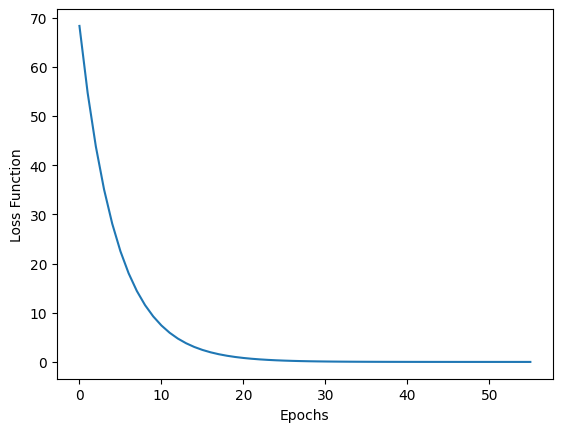

The error Between the Original Vector and the Calculated Vector:
0.007554713383775548
The Calculated Vector:
[1.99545489 2.99396546]
The Actual Vector:
[2 3]


In [148]:
seq_test = plot_values(learning_rate=0.01)

We can see that the given weight vector is very close to the actual vector. This is the process of gradient descent for a fixed learning rate. Now, let us look at the process of finding an optimal learning rate. We shall get the matrix A, which is the second gradient of the Loss function with respect to the weight vector. The math is included in the report, Look at ```section 1.1```

In [149]:
def quadratic_solution(coefficients):
    a = coefficients[0]
    b = coefficients[1]
    c = coefficients[2]
    sol = dict()
    determinant = b**2 - 4*a*c
    sol['sol'] = [0,0]
    if(determinant < 0):
        sol['det'] = "Negative"
        sol['sol'] = []
    else:
        sol['det'] = "Positive"
        sol['sol'][0] = (-b + np.sqrt(determinant))/(2*a)
        sol['sol'][1] = (-b - np.sqrt(determinant))/(2*a)
    return sol
def find_optimal_learning_rate(x_set, y_set, data_points):
    # Solving the quadratic equations for the Eigen Values of the Matrix. 
    x_1 = 2*sum(x_set**2)[0]/data_points
    x_4 = 2*sum(x_set**2)[1]/data_points
    # x_1 and x_4 are fine
    x_23 = 2*(sum([i[0]*i[1] for i in x_set])/data_points)
    a = 1
    b = (x_1 + x_4)*(-1)
    c = x_1*x_4 - x_23**2
    return 1/max(quadratic_solution([a, b, c])['sol'])
# find_optimal_learning_rate(training_set_x, training_set_y, 400)
print("Optimal Learning Rate: ")
opt_eta = find_optimal_learning_rate(training_set_x, training_set_y, 400)
print(opt_eta)

Optimal Learning Rate: 
0.0860075227762313


Now we have obtained the optimal learning rate, it is in the variable, ```opt_eta```

## Question - 1.4
### Question - 1.4.1 - Error vs Epoch Curves for various learning rates

In [150]:
learning_rate_1 = ((0.9)*opt_eta)/2
learning_rate_2 = ((1.5)*opt_eta)/2
learning_rate_3 = opt_eta
learning_rate_4 = (1.5)*opt_eta

Epoch:  12
Loss:  0.0008654523148297137


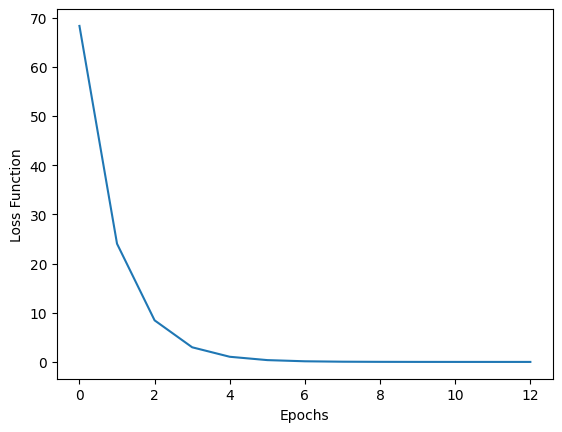

The error Between the Original Vector and the Calculated Vector:
0.004436292494488149
The Calculated Vector:
[1.99727129 2.99650217]
The Actual Vector:
[2 3]


In [151]:
seq_1 = plot_values(learning_rate_1)

Epoch:  6
Loss:  0.0007038678650593374


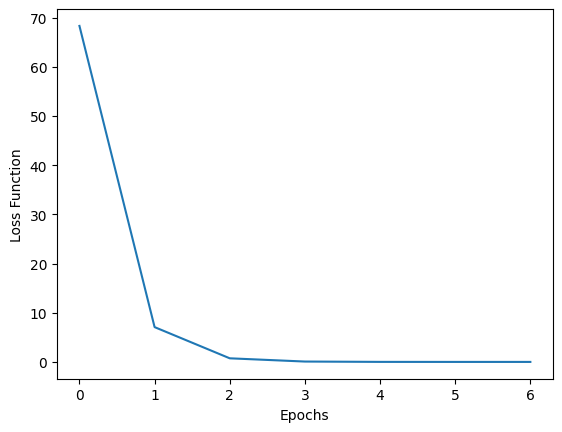

The error Between the Original Vector and the Calculated Vector:
0.0016685999993531235
The Calculated Vector:
[1.99892322 2.99872534]
The Actual Vector:
[2 3]


In [152]:
seq_2 = plot_values(learning_rate_2)

Epoch:  3
Loss:  0.0006734552590126426


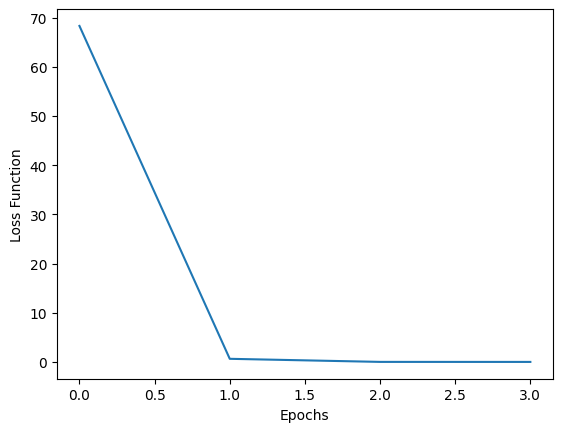

The error Between the Original Vector and the Calculated Vector:
0.0006811067711380018
The Calculated Vector:
[1.9995319  2.99950524]
The Actual Vector:
[2 3]


In [153]:
seq_3 = plot_values(learning_rate_3)

Epoch:  7
Loss:  0.0006945995313150308


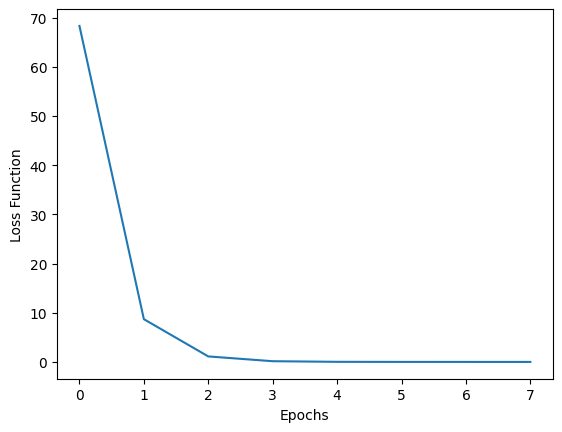

The error Between the Original Vector and the Calculated Vector:
0.0018172520964213402
The Calculated Vector:
[2.00020608 2.99819447]
The Actual Vector:
[2 3]


In [154]:
seq_4 = plot_values(learning_rate_4)

In [155]:
n = 5
# this number is going to decide how big the graph is going to be
test_parameter_1 = np.linspace(-1*n, n, 2*n + 1).astype(int)
print(test_parameter_1)
values = []
for i in range(2*n + 1):
    for j in range(2*n + 1):
        temp = dict()
        temp['params'] = [test_parameter_1[i], test_parameter_1[j]]
        temp['a'] = test_parameter_1[i]
        temp['b'] = test_parameter_1[j]
        temp['error'] = objective_loss_function(temp['params'], training_set_x, training_set_y, 400)
        values += [temp]
temp = pd.DataFrame(values)
ground_truth = [2, 3]
# def grid(x, y, z, resX=100, resY=100):
#     "Convert 3 column data to matplotlib grid"
#     xi = np.linspace(min(x), max(x), resX)
#     yi = np.linspace(min(y), max(y), resY)
#     Z = griddata(x, y, z, xi, yi)
#     X, Y = np.meshgrid(xi, yi)
#     return X, Y, Z
def contour_plot(seq):
    fig = plot.figure()
    ax = plot.axes()
    x = temp['a']
    y = temp['b']
    z = temp['error']
    plot.plot(ground_truth[0], ground_truth[1], 'yo')
    # [x, y] = np.meshgrid(x, y)
    # print(y)
    # z = objective_loss_function([x, y], training_set_x, training_set_y, 400)
    # z = (x-2)**2 + (y÷3)**2
    # print(x.shape)
    plot.tricontourf(x, y, z)
    for i in range(len(seq)-1):
        plot.arrow(x=seq[i][0], y =seq[i][1], dx = seq[i+1][0] - seq[i][0], dy = seq[i+1][1] - seq[i][1], width = 0.1, head_width = 0.1)
    plot.tight_layout()
    plot.show()
# print(temp['a'])

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


### Question 1.4.2 - Contour Plots of the convergence path

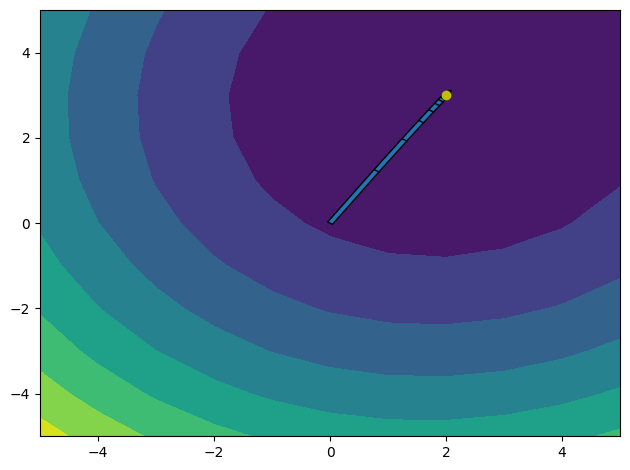

In [156]:
contour_plot(seq_1)

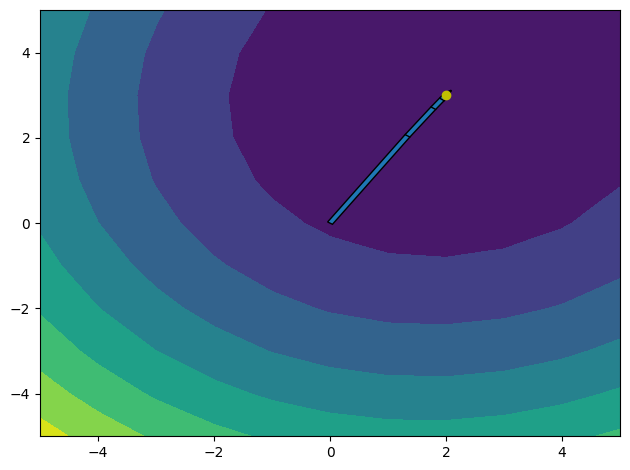

In [157]:
contour_plot(seq_2)

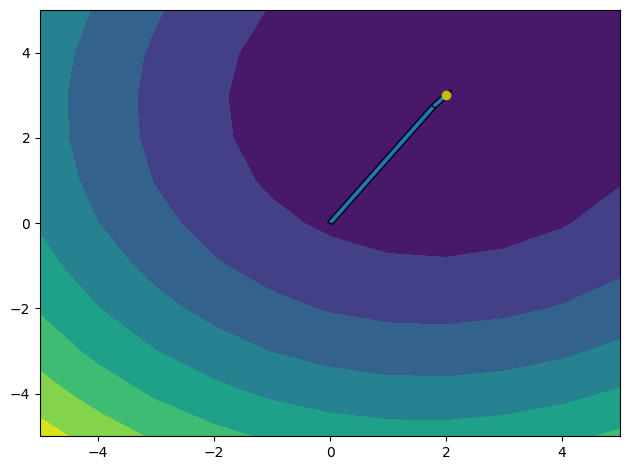

In [158]:
contour_plot(seq_3)

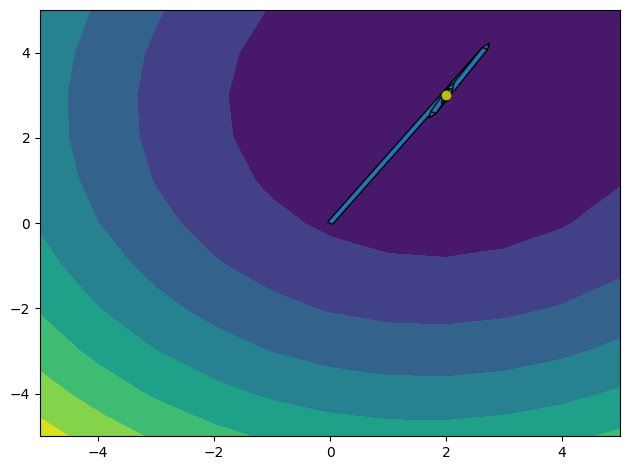

In [159]:
contour_plot(seq_4)

We can now see that after setting up the conditions as specified in the question, i.e. Convergence, when J  < 0.001, we can observe that the contour plots would look as following in the above sections. Each corresponding to their respective value of learning rate.

1. The convergence path has been monotonic
2. The convergence path has been monotonic, in fewer number of steps compared to ```seq_1```
3. The convergence path has been monotonic, in the fewest number of steps. 
4. The convergence path has been jittering.